# **📁Dataset Preperation📁**
Downloading and importing datasets, files and functions.





In [ ]:
#@title Imports/Download

!pip install tf2onnx
!pip install coremltools


import numpy as np

import random


import tensorflow as tf
import pandas as pd
import requests
import json
import glob
import os
import PIL
import tempfile
from PIL import Image
from google.colab import drive
from tensorflow.python.framework import graph_util
from tensorflow.python.framework import ops
from tensorflow.keras import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.python.keras import backend as K
from tensorflow.python.keras.models import load_model
import tf2onnx
import onnx



#Download dataset files
!git clone https://github.com/L0ADIN9/PAG_Dataset.git
!unzip /content/PAG_Dataset/Single_Sprite_Sheet.zip
#Plotting Import
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.style.use('bmh')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.8/455.8 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 45.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 7.5 MB/s eta 0:00:00
Cloning into 'PAG_Dataset'...
remote: Enumerating objects: 50, done.
remote: Counting objects: 100% (1/1), done.
remote: Total 50 (delta 0), reused 0 (delta 0), pack-reused 49
Receiving objects: 100% (50/50), 2.81 MiB | 26.66 MiB/s, done.
Resolving deltas: 100% (8/8), done.
Archive:  /content/PAG_Dataset/Single_Sprite_Sheet.zip
   creating: Single_Sprite_Sheet/
  inflating: __MACOSX/._Single_Sprite_Sheet  
  inflating: Single_Sprite_Sheet/4Attack_1.png  
  inflating: __MACOSX/Single_Sprite_Sheet/._4Attack_1.png  
  inflating: Single_Sprite_Sheet/Walk copy 2.png  
  inflating: __MACOSX/Single_Sprite_Sheet/._Walk copy 2.png  
  inflating: Single_Sprite_Sheet/Punk_run.png  

In [ ]:
#@title Formatting Functions
def ImageAugmentation (inp):
  i1 = []
  i2 = []
  i3 = []
  i4 = []
  i5 = []
  i6 = []
  i7 = []
  i8 = []
  i9 = []
  i10 = []
  for i in inp:
    i1.append(i)
    #i2.append(np.roll(i, -10,axis = 0))
    #i3.append(np.roll(i, 10,axis = 0))
    #i4.append(np.roll(i, -10,axis = 1))
    #i5.append(np.roll(i, 10,axis = 1))
    #i6.append(np.flip(i,1))
    #i7.append(np.flip(i,0))
    i8.append(np.rot90(i,1,))
    i9.append(np.rot90(i,2,))
    i10.append(np.rot90(i,3,))
  return i1,i2,i3,i4,i5,i6,i7,i8,i9,i10

def extractDataset(inp):
  finnalized_dataset_x1 = []
  finnalized_dataset_x2 = []
  finnalized_dataset_x3 = []
  for i in inp:
    wid = 1
    while (wid+2)<=len(i):
      for j in range(len(i)-wid-1):
        finnalized_dataset_x1.append( i[j])
        finnalized_dataset_x2.append(i[1+j+wid//2])
        finnalized_dataset_x3.append( i[1+j+wid])
      wid+=2
  return finnalized_dataset_x1, finnalized_dataset_x2, finnalized_dataset_x3

def imagePad(inp, leng):
  add = (leng-inp.shape[0])//2
  inp = np.pad(inp,((add,add),(add,add),(0,0)),'constant')
  return inp


def convToArray(inp, MLENG):
  base_animation = []
  for anim in inp:
    if anim.endswith("png"):
      ind = []
      img = np.array(mpimg.imread(anim))
      step = 0
      amnt = img.shape[1]//img.shape[0]
      w= img.shape[0]
      for i in range(amnt):
        new_img = img[:,step:w+step]
        step += w
        new_img = imagePad(new_img,MLENG)
        ind.append(new_img)
      i1,i2,i3,i4,i5,i6,i7,i8,i9,i10 = ImageAugmentation(ind)
      base_animation.append(i1)
      #base_animation.append(i2)
      #base_animation.append(i3)
     #base_animation.append(i4)
      #base_animation.append(i5)
      #base_animation.append(i6)
      #base_animation.append(i7)
      base_animation.append(i8)
      base_animation.append(i9)
      base_animation.append(i10)
  return base_animation

def displayDataset_x(inp):
  for i in inp:
    for k in i:
      imgplot = plt.imshow(np.array(k))
      plt.show()
def displayDataset_y(inp):
  for i in inp:
    imgplot = plt.imshow(np.array(i))
    plt.show()
def datasetShuffle(x):
  rng = np.random.default_rng()
  p = rng.permutation(len(x))
  return x[p]



844
(5070, 96, 96, 4)


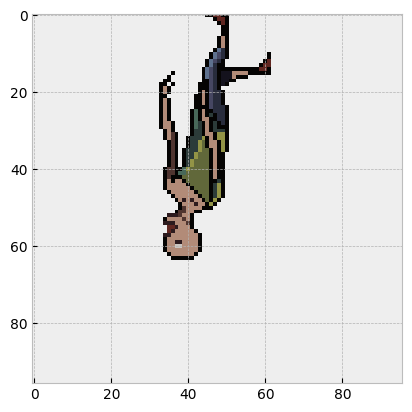

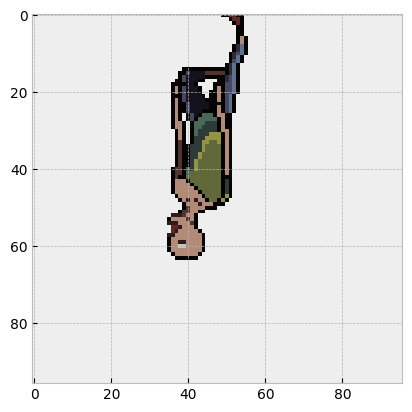

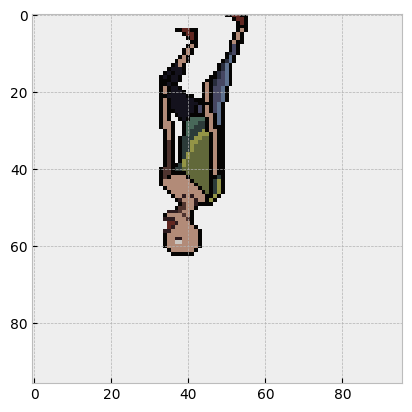

(5070, 96, 96, 4)


In [ ]:
Max_length = 96
dataset = convToArray(glob.glob("/content/Single_Sprite_Sheet/*.*"), Max_length)
random.shuffle(dataset)
print(len(dataset))

dataset_x1, dataset_x2, dataset_x3 = extractDataset(dataset)

dataset_x1 = np.array(dataset_x1)
dataset_x2 = np.array(dataset_x2)
dataset_x3 = np.array(dataset_x3)

text_x1 = dataset_x1[:10]
test_x2 = dataset_x2[:10]
test_x3 = dataset_x3[:10]

dataset_x1 = dataset_x1[10:]
dataset_x2 = dataset_x2[10:]
dataset_x3 = dataset_x3[10:]
print(np.shape(dataset_x1))

selec = 128
imgplot = plt.imshow(dataset_x1[selec])
plt.show()
imgplot = plt.imshow(dataset_x2[selec])
plt.show()
imgplot = plt.imshow(dataset_x3[selec])
plt.show()
print(dataset_x1.shape)



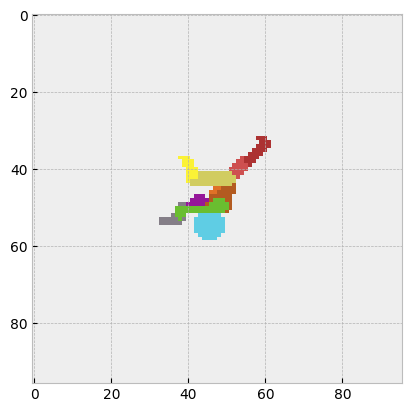

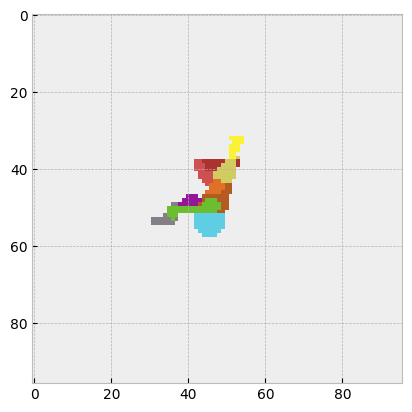

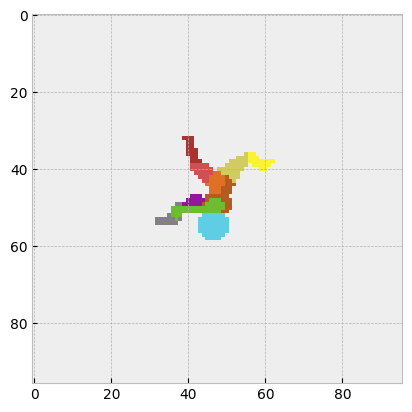

In [ ]:

for i in range(12,13):

  imgplot = plt.imshow(dataset_x1[i])
  plt.show()
  imgplot = plt.imshow(dataset_x2[i])
  plt.show()
  imgplot = plt.imshow(dataset_x3[i])
  plt.show()

# **🌴Generation of Model🌴**



In [ ]:
#@title U-Net 2 Encoder/Decoder Functions
def Encoder(z_dim):
  inputs = layers.Input(shape = (Max_length, Max_length, 4))
  x = layers.Conv2D(filters=8, kernel_size= 5, strides=2, padding='same', activation='relu')(inputs)
  print(x.shape)
  x = layers.Conv2D(filters=12, kernel_size= 2, strides=2, padding='same', activation='relu')(x)
  print(x.shape)
  x = layers.Conv2D(filters=12, kernel_size= 2, strides=2, padding='same', activation='relu')(x)
  print(x.shape)
  x = layers.Conv2D(filters=16, kernel_size= 2, strides=1, padding='same', activation='relu')(x)
  print(x.shape)
  x = layers.Flatten()(x)
  print(x.shape)
  x = layers.Dense(z_dim, activation = 'relu')(x)
  print(x.shape)
  return tf.keras.Model(inputs = inputs, outputs = x, name = 'encoder')

def Decoder(z_dim):
  inputs = layers.Input(shape= z_dim * 2)
  x = layers.Dense(2*24*24*z_dim)(inputs)
  x = layers.Reshape((24,24,z_dim*2))(x)
  x = layers.Conv2D(filters=128, kernel_size=(2,2), strides=1, padding='same', activation='relu')(x)
  print(x.shape)
  x = layers.UpSampling2D((2,2))(x)
  print(x.shape)
  x = layers.Conv2D(filters=64, kernel_size=(3,3), strides=1, padding='same', activation='relu')(x)
  print(x.shape)
  x = layers.UpSampling2D((2,2))(x)
  print(x.shape)
  x = layers.Conv2D(filters=32, kernel_size=(3,3), strides=1, padding='same', activation='relu')(x)
  print(x.shape)
  x = layers.Conv2D(filters=4, kernel_size=(4,4), strides=1, padding='same', activation='sigmoid')(x)
  print(x.shape)
  return tf.keras.Model(inputs=inputs, outputs=x, name='decoder')


(None, 48, 48, 8)
(None, 24, 24, 12)
(None, 12, 12, 12)
(None, 12, 12, 16)
(None, 2304)
(None, 200)
(None, 48, 48, 8)
(None, 24, 24, 12)
(None, 12, 12, 12)
(None, 12, 12, 16)
(None, 2304)
(None, 200)
(None, 24, 24, 128)
(None, 48, 48, 128)
(None, 48, 48, 64)
(None, 96, 96, 64)
(None, 96, 96, 32)
(None, 96, 96, 4)


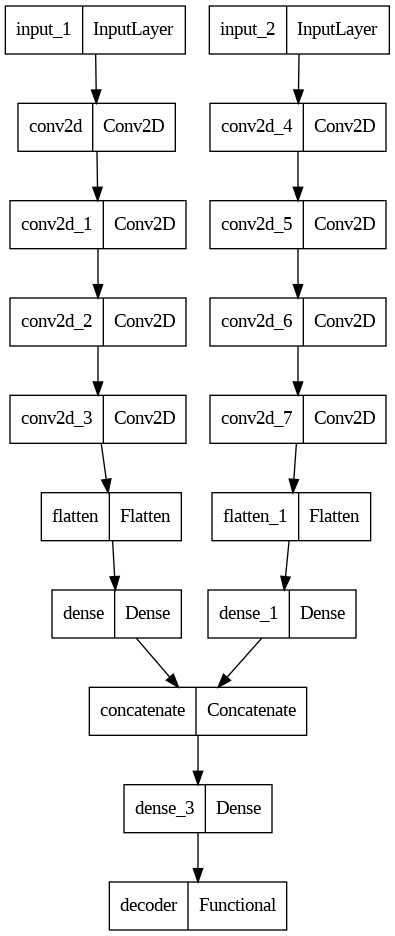

In [ ]:
#@title U-Net Generator
z_dim = 200
encoder = Encoder(z_dim)
encoder2 = Encoder(z_dim)
decoder = Decoder(z_dim)

combine = layers.Concatenate()([encoder.output, encoder2.output])
combine = layers.Dense(2*z_dim, activation = 'relu')(combine)
combine = decoder(combine)
autoencoder = tf.keras.Model(inputs = [encoder.input,encoder2.input], outputs = combine)
tf.keras.utils.plot_model(autoencoder)

In [ ]:
#@title U-Net Descriminator
'''
inputs = layers.Input(shape = (Max_length, Max_length, 4))
x = layers.Conv2D(filters=64, kernel_size= 5, strides=2, padding='same', activation='relu')(inputs)
print(x.shape)
x = layers.Conv2D(filters=64, kernel_size= 5, strides=2, padding='same', activation='relu')(x)
print(x.shape)
x = layers.Flatten()(x)
x = Layers.Dense(1)(x)

Descriminator = tf.keras.Model(inputs = [encoder.input, encoder2.input], outputs = x)
'''

"\ninputs = layers.Input(shape = (Max_length, Max_length, 4))\nx = layers.Conv2D(filters=64, kernel_size= 5, strides=2, padding='same', activation='relu')(inputs)\nprint(x.shape)\nx = layers.Conv2D(filters=64, kernel_size= 5, strides=2, padding='same', activation='relu')(x)\nprint(x.shape)\nx = layers.Flatten()(x)\nx = Layers.Dense(1)(x)\n\nDescriminator = tf.keras.Model(inputs = [encoder.input, encoder2.input], outputs = x)\n"

Epoch 1/35
159/159 [==============================] - 24s 78ms/step - loss: 0.0417
Epoch 2/35
159/159 [==============================] - 11s 71ms/step - loss: 0.0195
Epoch 3/35
159/159 [==============================] - 11s 71ms/step - loss: 0.0170
Epoch 4/35
159/159 [==============================] - 11s 71ms/step - loss: 0.0154
Epoch 5/35
159/159 [==============================] - 11s 70ms/step - loss: 0.0152
Epoch 6/35
159/159 [==============================] - 11s 70ms/step - loss: 0.0136
Epoch 7/35
159/159 [==============================] - 12s 73ms/step - loss: 0.0128
Epoch 8/35
159/159 [==============================] - 12s 73ms/step - loss: 0.0122
Epoch 9/35
159/159 [==============================] - 12s 72ms/step - loss: 0.0115
Epoch 10/35
159/159 [==============================] - 11s 72ms/step - loss: 0.0110
Epoch 11/35
159/159 [==============================] - 11s 72ms/step - loss: 0.0107
Epoch 12/35
159/159 [==============================] - 11s 71ms/step - loss: 0.0099
E

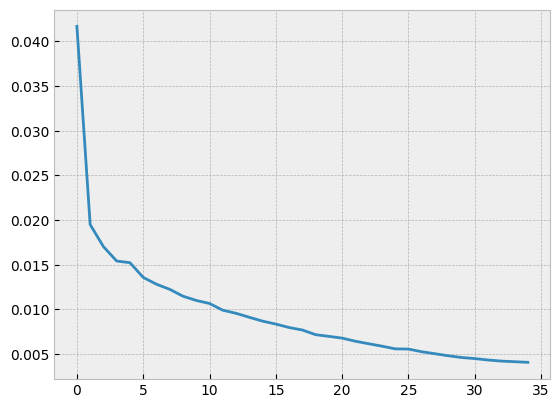

In [ ]:
model = autoencoder
model.compile(loss = "mean_squared_error", optimizer = 'adam'  )
history = model.fit((dataset_x1,dataset_x3),dataset_x2, epochs = 35,verbose = 1)
plt.plot(history.history['loss'])
plt.show()

#**🖌Model Post Prosceccing and Examination🖌**




In [ ]:
#@title Color Pre/Post Proscescing Functions
def calculateDistanceBetweenColors(a, b):
  r = abs(a[0] - b[0])
  g = abs(a[1] - b[1])
  bl = abs(a[2] - b[2])
  d = abs(a[3] - b[3])
  dis = (r+g+bl+d+d)/5
  return dis

def findClosestVal(histogram, val, lean, blank_color,blank_lean,border_color,border_lean):
  high = 1
  color = [0,0,0,0]
  if blank_color != None:
    if calculateDistanceBetweenColors(val, blank_color) < blank_lean:
      return blank_color
  if border_color != None:
    if calculateDistanceBetweenColors(val, border_color) < border_lean:
      return border_color
    return color

  for cnt in range(len(histogram)):
    i = histogram[cnt]
    if calculateDistanceBetweenColors(val, i) < high:
      high = calculateDistanceBetweenColors(val, i )
      color = i
  if high > lean:
    return val
  return color

def colorSearch(histogram, val, lean):
  high = 1
  for cnt in range(len(histogram)):
    i = histogram[cnt]
    if calculateDistanceBetweenColors(val, i) < high:
      high = calculateDistanceBetweenColors(val, i )
  if high > lean:
    return False
  return True
def colorHistogramEncoder(img1, img2):

  ColorHistogram = []
  for i in range(img1.shape[0]):
    for j in range(img1.shape[1]):
      if not colorSearch(ColorHistogram, img1[i][j],.01):
        print("new")
        ColorHistogram.append(img1[i][j])
    for i in range(img2.shape[0]):
      for j in range(img2.shape[1]):
        if not colorSearch(ColorHistogram, img2[i][j],.01):
          print("new")
          ColorHistogram.append(img2[i][j])
  return ColorHistogram


def colorHistogramDecoder(img, histogram, lean, blank_color,blank_lean,border_color,border_lean):
  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      img[i][j] = findClosestVal(histogram,img[i][j],lean, blank_color,blank_lean,border_color,border_lean)
  return img






In [ ]:
selec = 999
imgplot = plt.imshow(dataset_x1[selec])
plt.show()
imgplot = plt.imshow(dataset_x2[selec])
plt.show()
imgplot = plt.imshow(dataset_x3[selec])
plt.show()
i = model.predict([dataset_x1[selec][np.newaxis],dataset_x3[selec][np.newaxis]])
i = i[0]
imgplot = plt.imshow(i)
plt.show()

histogram = colorHistogramEncoder(dataset_x1[selec],dataset_x3[selec])
print(histogram)
border_color=[0,0,0,1]
blank_color=[0,0,0,0]

In [ ]:
i = colorHistogramDecoder(i, histogram, .3 ,None,.5,None,.5)
imgplot = plt.imshow(i)
plt.show()
i = colorHistogramDecoder(i, histogram, .2 ,None,.5,None,.5)
imgplot = plt.imshow(i)
plt.show()
i = colorHistogramDecoder(i, histogram, .1 ,None,.5,None,.5)
imgplot = plt.imshow(i)
plt.show()






'''
for p in range(9):
  imgplot = plt.imshow(test_y[p])
  plt.show()
  i = model.predict([text_x1[p][np.newaxis],test_x2[p][np.newaxis]])
  i=i[0]
  imgplot = plt.imshow(i)
  plt.show()

'''

NameError: name 'i' is not defined

#**⬇Model Deployment⬇**

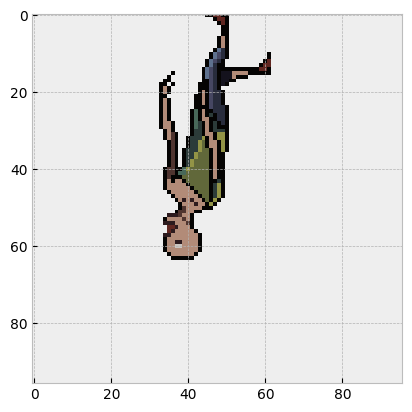

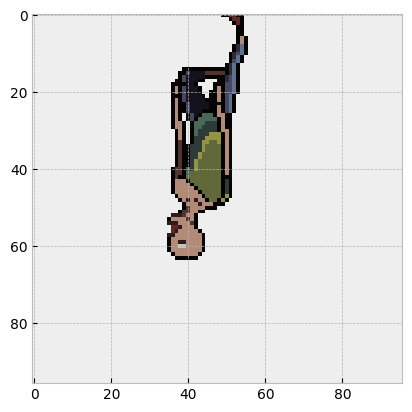

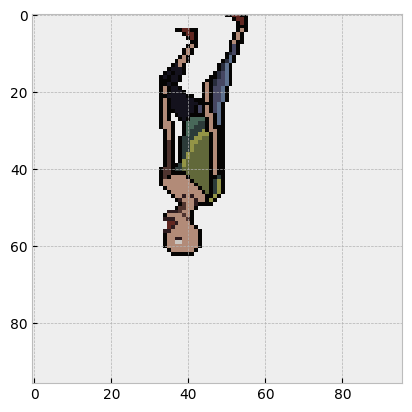

1/1 [==============================] - 1s 780ms/step


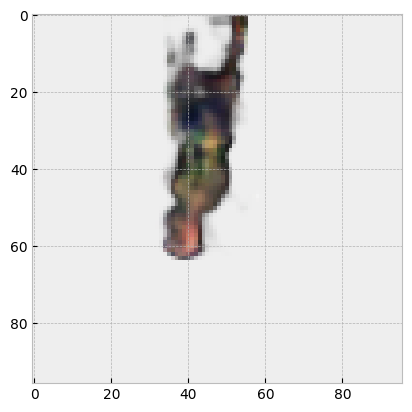

In [ ]:
#@title Preview Bare Model
imgplot = plt.imshow(dataset_x1[selec])
plt.show()
imgplot = plt.imshow(dataset_x2[selec])
plt.show()
imgplot = plt.imshow(dataset_x3[selec])
plt.show()
i = model.predict([dataset_x1[selec][np.newaxis],dataset_x3[selec][np.newaxis]])
i = i[0]
imgplot = plt.imshow(i)
plt.show()

In [ ]:
#@title download Keras Model

model.save('keras_model.keras')

#from google.colab import files
#files.download('keras_model.keras')

from google.colab import drive
drive.mount('/content/drive')

model.save('/content/drive/MyDrive/ModelFolder/interpolationModel', save_format="h5")

#import shutil
#shutil.copy('source','destination')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
#@title upload Keras Model
from google.colab import drive
drive.mount('/content/drive')

model = tf.keras.models.load_model('/content/drive/MyDrive/ModelFolder/interpolationModel')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#@title Save and Download Model in ONNX Format
from google.colab import files

input_signature = [tf.TensorSpec([None, 96, 96, 4], tf.float32, name='input_1'),
                   tf.TensorSpec([None, 96, 96, 4], tf.float32, name='input_2')]

onnx_model, _ = tf2onnx.convert.from_keras(model, input_signature, opset=13)
onnx.save(onnx_model, "/content/model.onnx")
files.download("/content/model.onnx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#@title Save and Download Model in CoreML Format

import coremltools

model.save('InterpModel1.h5')

CoreMLmodel = coremltools.convert(model, convert_to="mlprogram")
CoreMLmodel.save('InterpModel1.h5')
from google.colab import files
files.download('InterpModel1.h5')

In [ ]:
#@title Save Model in JSON and HDF5
# Save ful model in HDF5

model.save('full_model.h5')

# Save the config in JSON Format

model_json = model.to_json()
with open("model_config.json", "w") as f:
    f.write(model_json)

# Save Weights

model.save_weights('model_weights.h5')

# Download Everything

from google.colab import files
files.download("/content/model_config.json")
files.download("/content/model_weights.h5")
files.download("/content/full_model.h5")


In [ ]:
#@title Save Model in TFLITE
model_dir = 'saved_model/1'
tf.saved_model.save(model,model_dir,)
'''
//!zip -r /content/savedModel.zip /content/saved_model
'''
converter = tf.lite.TFLiteConverter.from_saved_model(model_dir)
tflite_model = converter.convert()
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)
##from google.colab import files
#files.download("/content/model.tflite")